In [7]:
import pandas as pd
import os, time,json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Extract more data: 2018 and 2020 Movies

In [2]:
with open('/Users/qfu88/.secret/tmdb_api.json', 'r') as f:
    login = json.load(f)
login.keys()

dict_keys(['api-key'])

In [3]:
!pip install tqdm
from tqdm.notebook import tqdm_notebook

In [4]:
!pip install tmdbsimple
import tmdbsimple as tmdb
tmdb.API_KEY =  login['api-key']

In [5]:
#define a function to add the certification with the other key information.
def get_movie_certification(movie_id):
    movie = tmdb.Movies(movie_id)
    info = movie.info()
    releases = movie.releases()
    for c in releases['countries']:
        if c['iso_3166_1'] == 'US':
            info['certification'] = c['certification']
    return info

In [6]:
#define the write_json function
def write_json(new_data, filename): 
    """Appends a list of records (new_data) to a json file (filename). 
    Adapted from: https://www.geeksforgeeks.org/append-to-json-file-using-python/"""  
    
    with open(filename,'r+') as file:
        # First we load existing data into a dict.
        file_data = json.load(file)
        ## Choose extend or append
        if (type(new_data) == list) & (type(file_data) == list):
            file_data.extend(new_data)
        else:
             file_data.append(new_data)
        # Sets file's current position at offset.
        file.seek(0)
        # convert back to json.
        json.dump(file_data, file)

In [8]:
# designate a folder
FOLDER = "Data/"
os.makedirs(FOLDER, exist_ok=True)
os.listdir(FOLDER)

['.ipynb_checkpoints',
 'final_tmdb_data_2000.csv.gz',
 'final_tmdb_data_2001.csv.gz',
 'title_akas.csv.gz',
 'title_basics.csv.gz',
 'title_rating.csv.gz',
 'tmdb_api_results_2000.json',
 'tmdb_api_results_2001.json',
 'tmdb_results_combined.csv.gz']

In [9]:
#load in the title basics data
basics = pd.read_csv('Data/title_basics.csv.gz')

In [10]:
# create required lists for the loop
## define a list of the year to extract from the API
YEARS_TO_GET = [2018,2020]

In [11]:
#define an errors list 
errors = [ ]

## Loops

In [12]:
for YEAR in tqdm_notebook(YEARS_TO_GET, desc='YEARS', position=0):
    JSON_FILE = f'{FOLDER}tmdb_api_results_{YEAR}.json'
    file_exists = os.path.isfile(JSON_FILE)
    if file_exists == False:
         with open(JSON_FILE,'w') as f:
                json.dump([{'imdb_id':0}],f)
      #define the IDs to call
    #Saving new year as the current df
    df = basics.loc[ basics['startYear']==YEAR].copy()
    # saving movie ids to list
    movie_ids = df['tconst'].copy()
        #Check for and remove any previously downloaded Movie id's
## Load existing data from json into a dataframe called "previous_df"
    previous_df = pd.read_json(JSON_FILE)
# filter out any ids that are already in the JSON_FILE
    movie_ids_to_get = movie_ids[~movie_ids.isin(previous_df['imdb_id'])]
    for movie_id in tqdm_notebook(movie_ids_to_get,
                              desc=f'Movies from {YEAR}',
                              position=1,
                              leave=True):
        try:
        # Retrieve then data for the movie id
            temp = get_movie_certification(movie_id)  
        # Append/extend results to existing file using a pre-made function
            write_json(temp,JSON_FILE)
        # Short 20 ms sleep to prevent overwhelming server
            time.sleep(0.02)

        except Exception as e:
            print(e)
            errors.append([movie_id, e])
        final_year_df = pd.read_json(JSON_FILE)
        final_year_df.to_csv(f"{FOLDER}final_tmdb_data_{YEAR}.csv.gz", compression="gzip", index=False)
print(f"- Total errors: {len(errors)}")

YEARS:   0%|          | 0/2 [00:00<?, ?it/s]

Movies from 2018:   0%|          | 0/5634 [00:00<?, ?it/s]

404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0276568?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0850247?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt10013634?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt10018116?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt10027174?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt10052452?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt10078138?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt10086764?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client

404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt11053238?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt11086730?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt11148860?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt11202454?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt11212824?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt11212874?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt11243154?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt11243170?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Clie

404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt13469602?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt13611066?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt13759198?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt13764864?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt13878674?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt13912570?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt14005686?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt14017054?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Clie

404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt19515566?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt19516328?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt19516612?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt19768298?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt19768330?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt19768366?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt19768488?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt19799688?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Clie

404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt4084672?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt4087362?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt4089672?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt4133310?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt4156056?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt4161482?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt4215684?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt4329936?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error

404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt5618010?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt5618938?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt5650436?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt5653626?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt5702054?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt5705552?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt5722456?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt5772704?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error

404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt6486294?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt6501500?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt6501934?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt6505182?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt6513620?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt6530310?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt6545212?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt6546302?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error

404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt7131438?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt7143602?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt7143718?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt7143770?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt7144240?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt7144874?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt7154136?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt7168778?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error

404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt7517162?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt7517632?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt7536276?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt7536914?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt7549788?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt7554880?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt7558876?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt7565768?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error

404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt7853056?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt7853312?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt7856410?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt7860292?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt7877470?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt7881506?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt7893584?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt7896034?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error

404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt8093306?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt8096198?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt8097914?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt8097932?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt8106460?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt8106912?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt8106964?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt8111524?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error

404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt8332094?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt8332878?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt8343654?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt8346922?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt8351256?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt8354710?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt8355326?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt8355868?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error

404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt8559876?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt8564100?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt8578466?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt8581140?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt8581816?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt8585430?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt8585488?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt8591604?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error

404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt8835028?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt8844124?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt8847696?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt8851378?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt8852696?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt8856456?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt8865106?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt8865770?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error

404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt9054078?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt9060114?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt9061142?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt9067270?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt9068710?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt9068900?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt9071040?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt9071108?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error

404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt9302226?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt9313558?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt9331072?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt9334162?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt9334258?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt9343816?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt9356304?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt9356670?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error

404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt9787140?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt9788766?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt9792940?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt9803724?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt9810392?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt9816230?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt9816310?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt9822858?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error

Movies from 2020:   0%|          | 0/4868 [00:00<?, ?it/s]

404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt10055284?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt10085194?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt10086754?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt10111116?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt10125752?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt10150920?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt10167850?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt10199854?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Clie

404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt11049532?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt11052558?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt11056322?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt11096100?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt11120888?api_key=cd868cf5ad2adc0c1899fbc73f330625
('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt11126046?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt11137380?api_key=cd868cf5ad2adc0c1899fbc73f33

404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt11681170?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt11683262?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt11685344?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt11685822?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt11686784?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt11687018?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt11689968?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt11696020?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Clie

404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt11957598?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt11963752?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt11973628?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt11974262?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt11979442?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt11982040?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt11989602?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt12007204?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Clie

404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt12236916?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt12237778?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt12250368?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt12256426?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt12257776?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt12258334?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt12258542?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt12265044?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Clie

404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt12482554?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt12484098?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt12489826?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt12509804?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt12511594?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt12517242?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt12517500?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt12524278?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Clie

404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt12780846?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt12781038?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt12785864?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt12787652?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt12788656?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt12793064?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt12794300?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt12794372?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Clie

404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt12962124?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt12969478?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt12969512?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt12969746?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt12969890?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt12970408?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt12974838?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt12975938?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Clie

404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt13150474?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt13158016?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt13161312?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt13162008?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt13162102?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt13162564?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt13167102?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt13167770?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Clie

404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt13392656?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt13392684?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt13403584?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt13408266?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt13409100?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt13414790?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt13417006?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt13423846?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Clie

404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt13660302?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt13664332?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt13665806?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt13672900?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt13683056?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt13684084?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt13692932?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt13696028?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Clie

404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt14234582?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt14236074?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt14245188?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt14254990?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt1427931?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt14282260?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt14290026?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt14293146?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Clien

404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt15100424?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt15151030?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt15170686?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt15184522?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt15249430?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt15269930?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt15288646?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt15295198?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Clie

404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt21141552?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt21156892?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt21330284?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt21375416?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt21632050?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt21661762?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt21834308?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt21839542?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Clie

404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt5635918?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt5647002?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt5660210?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt5686776?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt5697994?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt5719048?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt5790156?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt5902316?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error

404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt8900124?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt8907348?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt9001428?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt9010446?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt9014704?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt9037854?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt9089510?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt9139246?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error

## Combining all files from the API calls

In [13]:
import glob
q = "Data/final_tmdb_data*.csv.gz"
year_files = sorted(glob.glob(q))
year_files

['Data\\final_tmdb_data_2000.csv.gz',
 'Data\\final_tmdb_data_2001.csv.gz',
 'Data\\final_tmdb_data_2018.csv.gz',
 'Data\\final_tmdb_data_2020.csv.gz']

In [15]:
## Loading and Concatenating the list of dfs with 1 line
df_combined = pd.concat([pd.read_csv(file, index_col=0) for file in year_files])

In [16]:
## Saving the final combined dataframe
final_fname ='Data/final_tmdb_combined.csv.gz'
df_combined.to_csv(final_fname, compression='gzip', index=False)

In [25]:
df_combined = pd.read_csv(final_fname)
df_combined.head()

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,Two rural teens sing and dance their way throu...,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.5,22.0,NaN
2,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,Earth is in a state of constant war and two co...,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.1,8.0,NaN
3,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,"After falling prey to underworld, four friends...",...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,0.0,0.0,NaN
4,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,花樣年華,"Hong Kong, 1962: Chow Mo-Wan and Su Li-Zhen mo...",...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.1,1987.0,PG


In [27]:
df_combined = df_combined[['revenue', 'certification']]
df_combined = df_combined.dropna(subset = 'certification')
df_combined.head()

,revenue,certification
4,12854953.0,PG
5,0.0,R
6,0.0,R
7,0.0,R
11,14904.0,R


## Visualize the groups of different certification to see the different

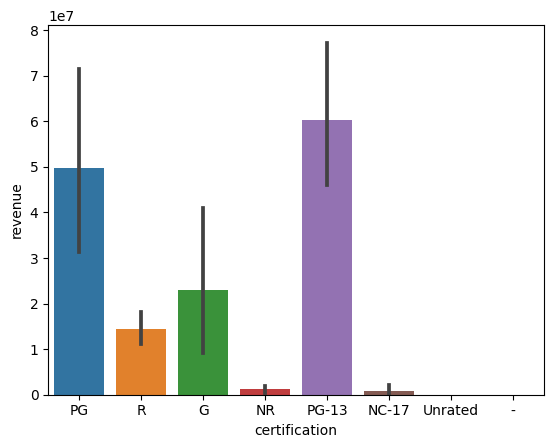

In [28]:
sns.barplot(data=df_combined, x='certification',y='revenue');

In [34]:
df_combined.loc[df_combined['certification']=='Unrated']

,revenue,certification
483,0.0,Unrated


In [36]:
df_combined = df_combined.drop(index=483)

In [37]:
df_combined.loc[df_combined['certification']=='-']

,revenue,certification
2029,0.0,-


In [38]:
df_combined = df_combined.drop(index=2029)

# Hypothesis Test

does the MPAA rating of a movie (G/PG/PG-13/R) affect how much revenue the movie generates?

## State the null and alternative hypotheses.

Null Hypothesis: All the movies regardless of the movie’s MPAA rating generate the same revenue.

Alternate Hypothesis: There is significant difference between the revenue of the movie with different MPAA ratings can generate.

significance level of alpha = 0.05


## Choose the appropriate hypothesis test

Based on question we need to answer:

we are measuring the revenue which is a numeric quantity.

we are comparing more than two groups: MPAA rating of a movie (G/PG/PG-13/R)

Therefore, the appropriate test to perform would be:

One Way ANOVA


## Check and address the assumptions for the test

For the One Way ANOVA test , we need to test the following assumptions:

No significant outliers

Normality

Equal Variance


## Separating Our Groups

In [39]:
groups = {}
## Loop through all unique categories
for i in df_combined['certification'].unique():
    ## Get series for group and rename
    data = df_combined.loc[df_combined['certification']==i,'revenue'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['PG', 'R', 'G', 'NR', 'PG-13', 'NC-17'])

In [40]:
df_combined['certification'].value_counts()

R        992
NR       540
PG-13    480
PG       208
G         81
NC-17     26
Name: certification, dtype: int64

## Checking assumptions

### Checking for normality
since all groups have n>15, we can safely ignore the assumption of normality